<h1><center>Laboratorio 4: Spark y EDA</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Primavera 2024</strong></center>

### Cuerpo Docente:

- Profesores: Ignacio Meza, Sebastián Tinoco
- Auxiliar: Eduardo Moya
- Ayudantes: Nicolás Ojeda, Melanie Peña, Valentina Rojas

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Cristian Oyarzo M.
- Nombre de alumno 2: Sebastián Quenti A.


### **Link de repositorio de GitHub:** [Repositorio](https://github.com/sebaquenti/Repositorio-MDS7202)

## Reglas:

- **Grupos de 2 personas**
- Fecha de entrega: 6 días de plazo con descuento de 1 punto por día. Entregas Jueves a las 23:59.
- Instrucciones del lab el viernes a las 16:15 en formato online. Asistencia no es obligatoria.
- <u>Prohibidas las copias</u>. Cualquier intento de copia será debidamente penalizado con el reglamento de la escuela.
- Tienen que subir el laboratorio a u-cursos y a su repositorio de github. Labs que no estén en u-cursos no serán revisados. Recuerden que el repositorio también tiene nota.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Pueden usar cualquier material del curso que estimen conveniente.

### Temas a tratar

- Introducción al manejo y análisis de grandes volúmenes de datos por medio de la libreria `pyspark`.

### Objetivos principales del laboratorio

- Entender, aplicar y aprovechar las ventajas que nos ofrece la libreria `pyspark` para manejar datos tabulares de gran volúmen.
- Crear gráficos para el desarrollo de Análisis de Datos Exploratorios (EDA).

### Datos del Lab

- Base de datos: https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/datos_lab_spark.parquet
- Objeto serializado: https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/object.pkl

## 1. Preguntas Teóricas [12 puntos]
(2 por pregunta)

<center>
<img src="https://img.buzzfeed.com/buzzfeed-static/static/2018-08/1/17/enhanced/buzzfeed-prod-web-05/anigif_enhanced-9173-1533160033-1.gif" width=350 />



Responda en  máximo 5 líneas las siguientes preguntas:
1. ¿Qué es Apache Spark y cuáles son sus principales ventajas sobre Pandas?
2. ¿Qué es un RDD en Spark? Describe una de sus principales características. ¿Qué tienen que ver con los dataframes?.
3. Diferencia entre transformaciones y acciones en Spark. Proporciona ejemplos de cada una. ¿Qué ocurre internamente cuando se ejecuta una acción?
4. Explica la importancia del particionamiento en Spark y cómo afecta el rendimiento del procesamiento de datos.
5. ¿Cuáles son las funciones de Spark Driver y Spark Executor?
6. ¿Qué es el Catalyst Optimizer en Apache Spark y cuál es su función principal en la optimización de consultas SQL?


**Respuestas**

> Respuestas aquí
1. Apache Spark es un potente motor unificado, diseñado para el procesamiento de datos a gran escala, tanto en centros de datos físicos como en entornos de nube. Sus principales ventajas son la gestión de la memoria y un mejor desempeño con grandes volúmenes de datos. Además, ofrece la posibilidad para operaciones paralelas y distribuidas en diferentes dispositivos.
2. Un RDD es una colección distribuida e inmutable de elementos. Los RDD son inmutables, lo que significa que no se pueden cambiar una vez creados. Los RDD son las listas de datos distribuidas y los DataFrames son tablas que hacen que trabajar con esos datos sea más fácil y rápido.
3. Las transformaciones son operaciones que toman un RDD o DataFrame como entrada y producen uno nuevo como salida y  las acciones son operaciones que desencadenan la ejecución de las transformaciones acumuladas. Un ejemplo de transformación podría ser orderBy() y de acción show(). Cuando se realiza una transformación, internamente son perezosas (lazy), lo que significa que no se ejecutan inmediatamente y las acciones se ejecutan inmediatamente.
4. El particionamiento de datos es importante, ya que promueve el paralelismo. Con esto, al distribuir los datos en segmentos o particiones, se facilita que los ejecutores (executors) de Spark procesen datos que se encuentran físicamente más próximos a ellos, reduciendo así el uso del ancho de banda necesario para la transferencia de datos. De este modo, se maximiza la eficiencia del procesamiento y se minimiza el tiempo de ejecución.
5. Las funciones de Spark Driver son comunicarse con el gestor de clústers para solicitar recursos, los cuales serán utilizados por los ejecutores de Spark. Mientras que las funciones de Spark Executor son llevar a cabo las tareas asignadas por el conductor en los nodos de trabajo, procesando datos y devolviendo los resultados al conductor.
6. Catalyst Optimizer es un componente central del motor de consultas de Apache Spark que se encarga de optimizar las consultas SQL. La principal función del Catalyst Optimizer es optimizar las consultas SQL o las operaciones de DataFrames mediante una serie de transformaciones y optimizaciones lógicas.

## Parte Práctica



<center>
<img src="https://pbs.twimg.com/ad_img/1285681293590749189/kDckYy6Z?format=png&name=900x900" width=350 />

Juan Carlos Bodoque, el famoso periodista y empresario, decidió diversificar su portafolio de negocios y crear su propia plataforma de e-commerce. Después de varios años de investigar y analizar el mercado financiero, finalmente logró fundar Bodoque E-Shop con el objetivo de ofrecer a sus clientes una experiencia personalizada y confiable en sus transacciones.

Sin embargo, con la llegada de los aliens al planeta Tierra, aparecen nuevos desafíos para el negocio. Por ello, Bodoque decide invertir en un equipo de expertos en tecnología y comercio interplanetario, para que Bodoque Shop implemente las últimas innovaciones en servicio al cliente para garantizar la satisfacción y fidelización de sus nuevos clientes.

El primer objetivo de Bodoque E-Shop será la hacer un análisis exploratorio para entender mejor el comportamiento de los usuarios en la plataforma. Para ello Bodoque les hace entrega de un extenso dataset en el que se registran las actividades que han realizado sus clientes durante los últimos meses. A continuación se presenta un diccionario de variables que levanto el equipo de consultores interplanetarios de Bodoque:

1. `Transaction ID`: A unique identifier for each transaction.
2. `Customer ID`: A unique identifier for each customer.
3. `Transaction Amount`: The total amount of money exchanged in the transaction in USD.
4. `Transaction Date`: The date and time when the transaction took place.
5. `Payment Method`: The method used to complete the transaction (e.g., credit card, PayPal, etc.).
6. `Product Category`: The category of the product involved in the transaction.
7. `Quantity`: The number of products involved in the transaction.
8. `Customer Age`: The age of the customer making the transaction.
9. `Customer Location`: The geographical location of the customer.
10. `Device Used`: The type of device used to make the transaction (e.g., mobile, desktop).
11. `IP Address`: The IP address of the device used for the transaction.
Shipping Address: The address where the product was shipped.
12. `Billing Address`: The address associated with the payment method.
13. `Is An Alien`: A binary indicator of whether customer is an alien.
14. `Account Age Days`: The age of the customer's account in days at the time of the transaction.
15. `Transaction Hour`: The hour of the day when the transaction occurred.


### Importamos librerias utiles y cargamos los datos😸

In [1]:
!pip install pyspark
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.2-py2.py3-none-any.whl size=317812365 sha256=24e19547b6dd9e1bacff2b6add145a3e8a4aa94e51f165ff445c8c773dff6d99
  Stored in directory: /root/.cache/pip/wheels/34/34/bd/03944534c44b677cd5859f248090daa9fb27b3c8f8e5f49574
Successfully built pyspark


In [2]:
# Libreria Core del lab.
import pyspark
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession
import pandas as pd
from pyspark.sql.types import StringType, IntegerType, FloatType


#Libreria para plotear
!pip install --upgrade plotly
!pip install missingno
import matplotlib.pyplot as plt
import plotly.express as px

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.0/19.0 MB 38.7 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


Cargue los datos usando **pyspark**

> Nota: Puede ser util el siguiente [enlace](https://www.oracle.com/cl/java/technologies/downloads/#jdk22-windows)

In [3]:
# Escriba su respuesta aquí
sparksession = SparkSession.builder.master("local").appName("lab4").getOrCreate()

!wget https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/datos_lab_spark.parquet

df = (
    sparksession.read
    .option("header",'True')
    .parquet("datos_lab_spark.parquet")
)

--2024-09-12 02:58:27--  https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/datos_lab_spark.parquet
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 79022616 (75M) [application/octet-stream]
Saving to: ‘datos_lab_spark.parquet’

datos_lab_spark.par 100%[===================>]  75.36M  46.3MB/s    in 1.6s    

2024-09-12 02:58:29 (46.3 MB/s) - ‘datos_lab_spark.parquet’ saved [79022616/79022616]



### 2. Limpieza con pyspark [8 puntos]
(1 punto por pregunta)

<center>
<img src="https://miro.medium.com/v2/resize:fit:600/1*A6PpTrehGLxCJWNcUsDTNg.jpeg" width=350 />



Para comenzar con el análisis exploratorio usted decide empezar limpiando la base de datos con **pyspark** dado el alto volumen de datos que genera diariamente Bodoque E-Shop.

**Nota: NO SE PERMITE EL USO DE PANDAS EN ESTA SECCIÓN**



1.   Utilice `.printSchema()` para revisar la estructura de los datos
2.   Muestre las primeras 10 filas del dataset. Hint: utilice `.show()`
3.   Imprima un muestreo aleatorio con el 5% de los datos diponibles. . Hint: utilice `.sample()`
4. Revise los tipos de datos de cada columna con `.dtypes()` y responda la siguiente pregunta: ¿Cuál/es columna/s tiene/n un tipo de dato que no es el adecuado y por qué?
5. Cree una función **cast_columns** que permita cambiar el tipo de datos de las columnas problemáticas. Luego utilice esta función respecto a lo respondido en la pregunta anterior.
6. Cuente la cantidad de datos nulos por variable. Recuerde que Spark no posee un método que le permita calcular directamente los nulos.
7. Elimine datos nulos.
8. Elimine datos duplicados.


1.

In [4]:
df.printSchema()

root
 |-- Transaction ID: string (nullable = true)
 |-- Customer ID: string (nullable = true)
 |-- Transaction Amount: double (nullable = true)
 |-- Transaction Date: timestamp_ntz (nullable = true)
 |-- Payment Method: string (nullable = true)
 |-- Product Category: string (nullable = true)
 |-- Quantity: double (nullable = true)
 |-- Customer Age: double (nullable = true)
 |-- Customer Location: string (nullable = true)
 |-- Device Used: string (nullable = true)
 |-- IP Address: string (nullable = true)
 |-- Shipping Address: string (nullable = true)
 |-- Billing Address: string (nullable = true)
 |-- Is An Alien: double (nullable = true)
 |-- Account Age Days: double (nullable = true)
 |-- Transaction Hour: double (nullable = true)



2.

In [5]:
df.show(10)

+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+
|      Transaction ID|         Customer ID|Transaction Amount|   Transaction Date|Payment Method|Product Category|Quantity|Customer Age|Customer Location|Device Used|     IP Address|    Shipping Address|     Billing Address|Is An Alien|Account Age Days|Transaction Hour|
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+
|4b4a5fe1-ec4d-4f9...|d1b87f62-51b2-493...|             58.09|2022-03-24 00:00:00| bank transfer|     electronics|     1.0|        17.0|    Amandaborough|       NULL| 212.195.49.198|Unit 

3.

In [6]:
df.sample(fraction=0.05, seed=38).show()

+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+------------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+
|      Transaction ID|         Customer ID|Transaction Amount|   Transaction Date|Payment Method|Product Category|Quantity|Customer Age| Customer Location|Device Used|     IP Address|    Shipping Address|     Billing Address|Is An Alien|Account Age Days|Transaction Hour|
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+------------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+
|784e99bc-992b-4e6...|                NULL|             89.38|2021-08-04 00:00:00|   credit card| health & beauty|    NULL|        35.0|              NULL|     mobile|           NULL|6

4.

In [7]:
df.dtypes

[('Transaction ID', 'string'),
 ('Customer ID', 'string'),
 ('Transaction Amount', 'double'),
 ('Transaction Date', 'timestamp_ntz'),
 ('Payment Method', 'string'),
 ('Product Category', 'string'),
 ('Quantity', 'double'),
 ('Customer Age', 'double'),
 ('Customer Location', 'string'),
 ('Device Used', 'string'),
 ('IP Address', 'string'),
 ('Shipping Address', 'string'),
 ('Billing Address', 'string'),
 ('Is An Alien', 'double'),
 ('Account Age Days', 'double'),
 ('Transaction Hour', 'double')]

La columna 'Is An Alien' sería más precisa si fuera tipo bool. 'Quantity', 'Transaction Hour', 'Customer Age' y 'Account Age Days' deberían ser enteras, ya que no hay necesidad de respresentar decimales o fracciones.

5.

In [8]:
def cast_columns(df, cols_types):
    """
    Cambia el tipo de múltiples columnas en un DataFrame de Spark.

    Parámetros:
    - df: DataFrame de Spark.
    - cols_types: Diccionario con nombres de columnas como claves y tipos de datos de Spark como valores.

    Retorna:
    - DataFrame de Spark con tipos de columnas modificados.
    """
    for col, dtype in cols_types.items():
        df = df.withColumn(col, df[col].cast(dtype))
    return df

In [9]:
from pyspark.sql.types import BooleanType

cols_to_cast = {
    'Is An Alien': BooleanType(),
    'Quantity': IntegerType(),
    'Transaction Hour': IntegerType(),
    'Customer Age': IntegerType(),
    'Account Age Days': IntegerType()} # cambio de tipo de las variables

df = cast_columns(df, cols_to_cast)

6.

In [10]:
# contar la cantidad de datos nulos por variable
from pyspark.sql.functions import when, rand, col, sum

exprs = [sum(when(col(c).isNull(), 1).otherwise(0)).alias(c) for c in df.columns]

df.agg(*exprs).show()

+--------------+-----------+------------------+----------------+--------------+----------------+--------+------------+-----------------+-----------+----------+----------------+---------------+-----------+----------------+----------------+
|Transaction ID|Customer ID|Transaction Amount|Transaction Date|Payment Method|Product Category|Quantity|Customer Age|Customer Location|Device Used|IP Address|Shipping Address|Billing Address|Is An Alien|Account Age Days|Transaction Hour|
+--------------+-----------+------------------+----------------+--------------+----------------+--------+------------+-----------------+-----------+----------+----------------+---------------+-----------+----------------+----------------+
|        126886|     126847|            126840|          126831|        126877|          126814|  126966|      126826|           126781|     126911|    126929|          126734|         126804|     126828|          126886|          126953|
+--------------+-----------+----------------

7.

In [11]:
# eliminando filas con nulos
df = df.na.drop(how="any")

8.

In [12]:
# eliminando datos duplicados
df = df.dropDuplicates()

### 3. Transformaciones con pyspark [6 puntos]
(1 punto por pregunta)

<center>
<img src="https://live.staticflickr.com/13/91801406_0e71d7f019_b.jpg" width=350 />



**Nota: NO SE PERMITE EL USO DE PANDAS EN ESTA SECCIÓN**

Para continuar con el análisis, los especistas de Bodoque les gustaría tener nuevas variables disponibles. Tras las notas de la reunión usted llega a la conclusión de que tiene que realizar las siguientes tareas (con el dataset preprocesado de la seccion anterior):


1.   Agregar una columna llamada "Transaction bp" con el **monto total** de la transacción en bodoque pesos. Se considera que $x$ dólares equivalen a $log(48+|x^{36}|)$ bodoque pesos.
2.   Crear una columna llamada "Transaction Month" con el mes en que se realiza una transacción.
3.   Crear la variable *Type of purchase* según la catidad de unidades vendidas de acuerdo a las siguientes categorías.
  * Compra minorista: 4 productos o menos.
  * Compra mayorista: 5 produtos o más.
4. Imprima los registros de compras hechas por alienígenas en el comecio mayorista.  Utilice `.filter()`.
5. Cuente la cantidad de compras realizadas por humanos y la cantidad de compras realizadas por alienígenas. Utilice `.groupby()`.
6. Muestre una tabla con la recaudación promedio por transacción para cada método de pago, tanto para humanos como alienígenas. Utilice `pivot()`.

In [13]:
from pyspark.sql.functions import log, abs, month, avg


# 1. Agregar la columna 'Transaction bp'
df = df.withColumn("Transaction bp", log(48 + abs(col("Transaction Amount") ** 36)))

# 2. Agregar la columna 'Transaction Month'
df = df.withColumn("Transaction Month", month(col("Transaction Date")))

# 3. Crear la columna 'Type of purchase'
df = df.withColumn("Type of purchase",
                   when(col("Quantity") <= 4, "Compra minorista")
                   .otherwise("Compra mayorista"))

# 4. Filtrar compras hechas por alienígenas en el comercio mayorista
alien_mayorista = df.filter((col("Is An Alien") == True) & (col("Type of purchase") == "Compra mayorista"))
alien_mayorista.show()

# 5. Contar la cantidad de compras realizadas por humanos y alienígenas
compra_counts = df.groupby("Is An Alien").count()
compra_counts.show()

# 6. Mostrar una tabla con la recaudación promedio por transacción para cada método de pago, tanto para humanos como alienígenas
pivot_table = df.groupby("Is An Alien").pivot("Payment Method").agg(avg("Transaction Amount"))
pivot_table.show()

+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+------------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+------------------+-----------------+----------------+
|      Transaction ID|         Customer ID|Transaction Amount|   Transaction Date|Payment Method|Product Category|Quantity|Customer Age| Customer Location|Device Used|     IP Address|    Shipping Address|     Billing Address|Is An Alien|Account Age Days|Transaction Hour|    Transaction bp|Transaction Month|Type of purchase|
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+------------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+------------------+-----------------+----------------+
|5c9dc53f-5c17-4df...|

### 4. EDA [20 puntos]
(1 punto por gráfico y 1 punto por su interpretación)

<center>
<img src="https://i.pinimg.com/originals/41/7e/7b/417e7b9089bcc20c4909df8954c6e742.gif" width=400 />



Esta sección tiene como objetivo evaluar su habilidad para generar reportes y conclusiones a partir de los patrones identificados en los datos proporcionados por Bodoque. Específicamente, se enfoca en **caracterizar las transacciones** y **explorar las diferencias y similitudes en el comportamiento de humanos y aliens**. Utilice el dataset que ya incluye las transformaciones necesarias.

Por favor, asegúrese de que **todas** las visualizaciones que realice cumplan con los siguientes criterios:
- Deben ser relevantes y fáciles de interpretar.
- Cada gráfico debe incluir un título claro, nombres en los ejes y leyendas adecuadas.
- Adjunte una breve descripción interpretativa junto a cada gráfico para explicar los resultados visualizados.

Para llevar a cabo esta tarea, siga los siguientes pasos utilizando la librería de visualización de su elección (matplotlib, seaborn, plotly, etc):

1. **Conversión del DataFrame a formato pandas** (2 puntos): Pase el DataFrame procesado a formato pandas. Evite realizar transformaciones adicionales con pandas.
2. **Visualización de Variables Categóricas** (2 puntos por visualización):
   - Genere **tres gráficos de barras** que diferencien entre humanos y aliens. Analice y comente cualquier diferencia o similitud observada entre estos dos grupos.
3. **Visualización de Variables Numéricas** (2 puntos por visualización):
   - Elabore **tres distplots** para examinar las distribuciones de variables numéricas, diferenciando entre humanos y aliens. Comente las diferencias o similitudes notables.
4. **Análisis de Patrones en Transacciones** (2 puntos por visualización):
   - Cree **tres gráficos avanzados** que ayuden a identificar patrones en las transacciones. Estos gráficos deben incorporar al menos dos dimensiones y diferir de los anteriores. Algunos ejemplos podrían ser un lineplot que muestre la cantidad de transacciones mensuales por canal de venta, o un barplot que exhiba los tres productos más vendidos por canal.

Estos pasos le permitirán no solo visualizar datos complejos de manera efectiva, sino también interpretar estos datos para extraer insights valiosos acerca del comportamiento de los consumidores en el contexto de Bodoque.

<Figure size 1000x600 with 0 Axes>

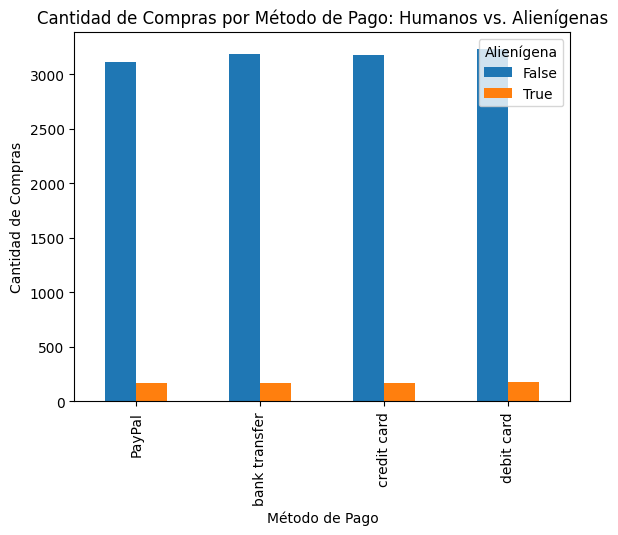

<Figure size 1000x600 with 0 Axes>

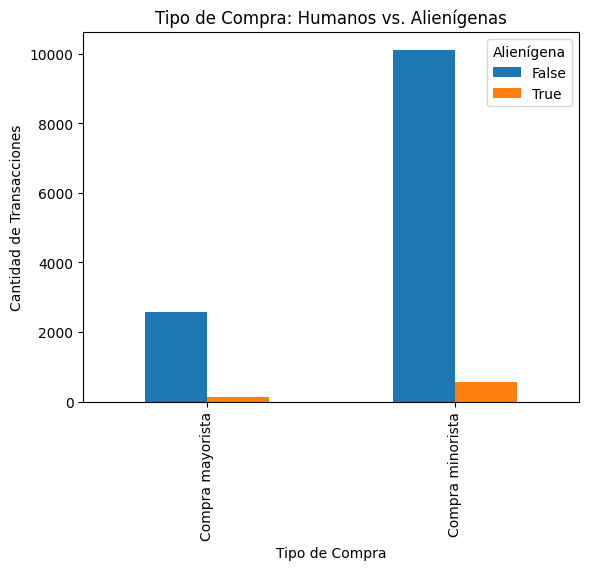

<Figure size 1000x600 with 0 Axes>

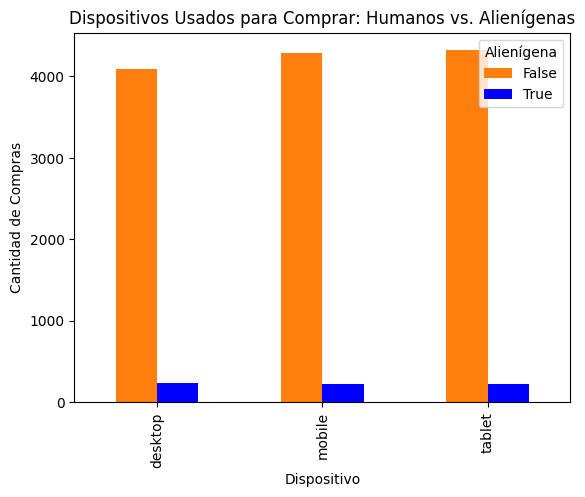

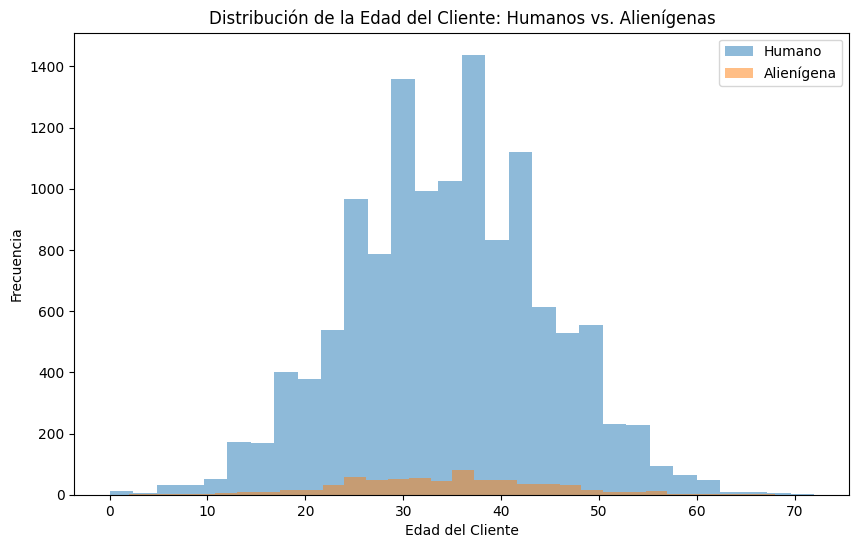

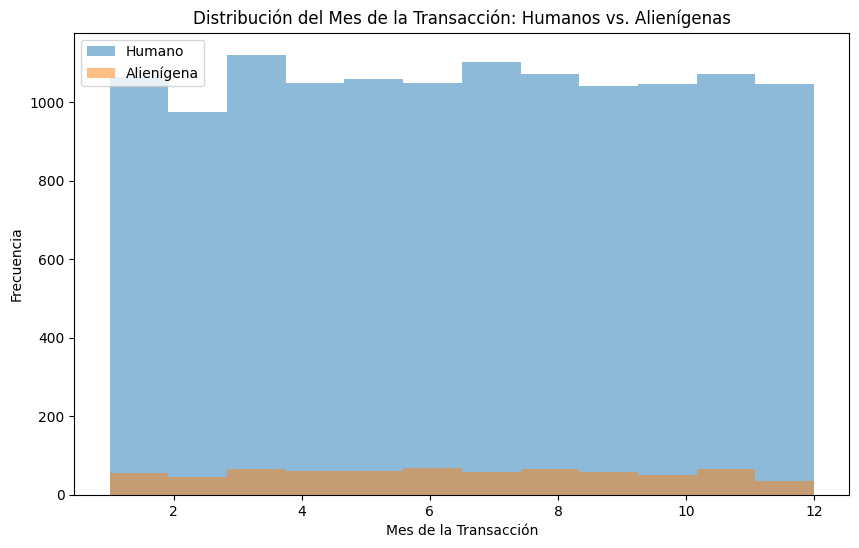

In [26]:
# Convertir el DataFrame de PySpark a pandas
pandas_df = df.toPandas()

# Visualización 1: Cantidad de Compras por Método de Pago
plt.figure(figsize=(10, 6))
pandas_df.groupby(['Payment Method', 'Is An Alien']).size().unstack().plot(kind='bar', stacked=False)
plt.title('Cantidad de Compras por Método de Pago: Humanos vs. Alienígenas')
plt.xlabel('Método de Pago')
plt.ylabel('Cantidad de Compras')
plt.legend(title='Alienígena')
plt.show()

# Visualización 2: Tipo de Compra (Minorista vs. Mayorista) por Especie
plt.figure(figsize=(10, 6))
pandas_df.groupby(['Type of purchase', 'Is An Alien']).size().unstack().plot(kind='bar', stacked=False)
plt.title('Tipo de Compra: Humanos vs. Alienígenas')
plt.xlabel('Tipo de Compra')
plt.ylabel('Cantidad de Transacciones')
plt.legend(title='Alienígena')
plt.show()

# Visualización 3: Dispositivos Usados para Comprar por Especie
plt.figure(figsize=(10, 6))
pandas_df.groupby(['Device Used', 'Is An Alien']).size().unstack().plot(kind='bar', stacked=False, color={True: 'blue', False: '#ff7f0e'})
plt.title('Dispositivos Usados para Comprar: Humanos vs. Alienígenas')
plt.xlabel('Dispositivo')
plt.ylabel('Cantidad de Compras')
plt.legend(title='Alienígena')
plt.show()

# Visualización 4: Distribución de la Edad del Cliente
plt.figure(figsize=(10, 6))
pandas_df[pandas_df['Is An Alien'] == False]['Customer Age'].plot(kind='hist', bins=30, alpha=0.5, label='Humano')
pandas_df[pandas_df['Is An Alien'] == True]['Customer Age'].plot(kind='hist', bins=30, alpha=0.5, label='Alienígena')
plt.title('Distribución de la Edad del Cliente: Humanos vs. Alienígenas')
plt.xlabel('Edad del Cliente')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

# Visualización 5: Distribución del Monto de la Transacción
fig = px.histogram(pandas_df, x='Transaction Amount', color='Is An Alien', marginal="box",
                   title='Distribución del Monto de la Transacción: Humanos vs. Alienígenas',
                   labels={'Transaction Amount':'Monto de la Transacción', 'count':'Cantidad', 'Is An Alien':'Alienígena'})
fig.show()

# Visualización 6: Distribución del Mes de la Transacción
plt.figure(figsize=(10, 6))
pandas_df[pandas_df['Is An Alien'] == False]['Transaction Month'].plot(kind='hist', bins=12, alpha=0.5, label='Humano')
pandas_df[pandas_df['Is An Alien'] == True]['Transaction Month'].plot(kind='hist', bins=12, alpha=0.5, label='Alienígena')
plt.title('Distribución del Mes de la Transacción: Humanos vs. Alienígenas')
plt.xlabel('Mes de la Transacción')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()



# Visualización 7: Cantidad de Transacciones por Mes, Método de Pago y Alien o no
# Agrupamos
monthly_transaction_counts = pandas_df.groupby(['Transaction Month', 'Payment Method', 'Is An Alien']).agg({
    'Transaction ID': 'count'
}).reset_index()

monthly_transaction_counts = monthly_transaction_counts.rename(columns={'Transaction ID': 'Transaction Count'})

average_monthly_transactions = monthly_transaction_counts.groupby(['Transaction Month', 'Payment Method']).agg({
    'Transaction Count': 'mean'
}).reset_index()


# Gráfico
fig = px.line(
    monthly_transaction_counts,
    x='Transaction Month',
    y='Transaction Count',
    color='Payment Method',
    line_dash='Is An Alien',
    markers=True,
    title='Promedio de Transacciones Mensuales por Método de Pago (Humanos vs. Alienígenas)',
    labels={
        'Transaction Month': 'Mes',
        'Transaction Count': 'Promedio de Cantidad de Transacciones',
        'Payment Method': 'Método de Pago',
        'Is An Alien': 'Alienígena'
    }
)


fig.show()


# Visualización 8: Monto Promedio por Método de Pago y Especie (matplotlib)
# Agrupamos
average_tariff = pandas_df.groupby(['Transaction Month', 'Payment Method', 'Is An Alien']).agg({
    'Transaction Amount': 'mean'
}).reset_index()

average_tariff = average_tariff.rename(columns={'Transaction Amount': 'Average Tariff'})

# Gráfico
fig = px.line(
    average_tariff,
    x='Transaction Month',
    y='Average Tariff',
    color='Payment Method',
    line_dash='Is An Alien',
    markers=True,
    title='Tarifa Promedio Mensual por Método de Pago (Humanos vs. Alienígenas)',
    labels={
        'Transaction Month': 'Mes',
        'Average Tariff': 'Tarifa Promedio',
        'Payment Method': 'Método de Pago',
        'Is An Alien': 'Alienígena'
    }
)

fig.show()


# Visualización 9: Productos Más Vendidos por Especie (Plotly Express)
total_counts = pandas_df.groupby('Is An Alien')['Quantity'].sum().reset_index()
total_counts = total_counts.rename(columns={'Quantity': 'Total Quantity'})

top_products = pandas_df.groupby(['Product Category', 'Is An Alien'])['Quantity'].sum().reset_index()
top_products = top_products.merge(total_counts, on='Is An Alien')

top_products['Proportional Quantity'] = top_products['Quantity'] / top_products['Total Quantity']

# Gráfico
fig = px.bar(
    top_products,
    x='Product Category',
    y='Proportional Quantity',
    color='Is An Alien',
    barmode='group',
    title='Productos Más Vendidos Proporcionalmente: Humanos vs. Alienígenas',
    labels={
        'Product Category': 'Categoría de Producto',
        'Proportional Quantity': 'Cantidad Proporcional Vendida',
        'Is An Alien': 'Alienígena'
    }
)

fig.show()

#### Gráfico 1
Se puede observar la gran diferencia que hay en la cantidad de compras con cualquier medio de pago de los humanos respecto a los aliens. Además, la distribución de los usos de los distintos medios de pago está bastante balanceada.

#### Gráfico 2
Las compras mayoristas son bastante inferiores contra las minoristas para ambos grupos, además cabe destacar que en ambos segmentos el humano es el mayor comprador.

#### Gráfico 3
La distribución de los dispositivos usados para las compras está balanceada entre los 3 y la diferencia entre humanos y aliens se debe a la cantidad de compras mostrada anteriormente.

#### Gráfico 4
Hablando de las proporciones, la cantidad de humanos comprados es mucho mayor a la de aliens compradores, pero ambos siguen una distribución similar a normal en sus edades.

#### Gráfico 5
Como es evidente, la mayor cantidad de transacciones se hacen en bajos montos, sim embargo, hay bastantes outliers, que significan que eventualmente se hacen transacciones de grandes valores.

#### Gráfico 6
De acuerdo al gráfico, no hay un mes en concreto donde se hagan más transacciones que en otro, tanto para humanos, como para aliens. La frecuencia es distinta en cada grupo por la cantidad de compras que hacen.

#### Gráfico 7
Para ambos grupos, humanos y aliens, no hay una tendencia clara de uso de algún método de pago en específico, pero se hace evidente que el primer grupo realiza más transacciones notando la diferencia del eje de las ordenadas.

#### Gráfico 8
Anteriormente pudimos observar que los aliens hacen una menor cantidad de transacciones, pero ahora vemos la tarifa promedio de las transacciones son más del doble que las de los humanos, tal vez por eso tienen una menor cantidad.

#### Gráfico 9
La compra en las categorías de productos están distribuidas balanceadamente en ambos grupos, no hay algún tipo en específico donde haya una tendencia.

### 5. Particiones y consultas en SQL [2 puntos]

<center>
<img src="https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/misc_images/1696330143457.gif" width=400 />

El equipo de Bodoque e-shop ha solicitado que los datos estén disponibles en una tabla SQL consultable. Además, están interesados en aprovechar las funciones de ventana en SQL para análisis avanzados. Las funciones de ventana permiten realizar cálculos sobre un conjunto de filas que están relacionadas con la fila actual. Por ejemplo, UNBOUNDED PRECEDING se usa para indicar que el rango de la función de ventana comienza desde la primera fila de la partición o del conjunto de resultados, lo cual es útil para calcular sumas acumulativas hasta la fila actual. Las variaciones comunes de este uso incluyen:

- `UNBOUNDED PRECEDING` to `CURRENT ROW`: Calcula desde el inicio de la partición hasta la fila actual.
- `UNBOUNDED PRECEDING` to `UNBOUNDED FOLLOWING`: Cubre todas las filas dentro de la partición.
- `VALUE PRECEDING` to `VALUE FOLLOWING`: Establece un rango específico basado en valores antes y después de la fila actual.

<center>
<img src="https://learnsql.com/blog/sql-window-functions-rows-clause/1.png" width=500 />

Ejemplo de uso en SQL:

```sql
STAT(COL1_NAME) OVER (PARTITION BY COL2_NAME ORDER BY COL3_NAME ROWS BETWEEN X PRECEDING AND CURRENT ROW)
```


Responda y realice los siguientes puntos:

1. **Creación de Tabla con PySpark** (2 puntos):
   - Desarrolle un script utilizando PySpark para crear una tabla a partir de un DataFrame previamente transformado. Seleccione y utilice una variable específica para la partición de la tabla. Justifique su elección de esta variable considerando factores como el tamaño del DataFrame, la distribución de los datos y el impacto potencial en el rendimiento de futuras consultas.

2. **Consulta SQL para Principales Clientes** (Bonus: 2 punto):
   - Ejecute una consulta SQL para identificar los 10 clientes que más productos han comprado. La consulta debe retornar el ID del cliente junto con el total de productos comprados, ordenados en forma descendente.

3. **Implementación de Función de Ventana en SQL y Equivalente en Spark** (Bonus: 2 punto):
   - Implemente una función de ventana en SQL para calcular la compra más alta realizada por cada usuario en los últimos tres meses. Además, describa cómo se podría realizar una función equivalente en Spark, considerando las capacidades específicas de PySpark para manejar este tipo de consultas.



1.

In [38]:
df.write.partitionBy("Customer ID").format("parquet").saveAsTable("partition")


Razón: Particionar la tabla por Customer ID permite que las consultas que agrupan o filtran por esta columna sean mucho más eficientes. Esto es particularmente útil para identificar a los principales clientes y para realizar cálculos de ventanas que involucran datos específicos de cada cliente, como las consultas que siguen.

2.

In [39]:
top_customers_sql = sparksession.sql("""
    SELECT
        `Customer ID`,
        SUM(`Quantity`) AS `Total Products Purchased`
    FROM
        partition
    GROUP BY
        `Customer ID`
    ORDER BY
        `Total Products Purchased` DESC
    LIMIT 10
""")

In [40]:
top_customers_sql.show()

+--------------------+------------------------+
|         Customer ID|Total Products Purchased|
+--------------------+------------------------+
|adcfac88-aefb-44e...|                       5|
|0830a8ff-e50b-450...|                       5|
|10c58adb-d0c8-4a4...|                       5|
|77e2117c-90c9-48b...|                       5|
|a4dc4ce9-325f-4ba...|                       5|
|d5a354bf-2e59-4d5...|                       5|
|66c6cfe6-f400-4aa...|                       5|
|b32a9429-5470-4c3...|                       5|
|1ba27c58-e28f-4b1...|                       5|
|4c38e73f-28e1-450...|                       5|
+--------------------+------------------------+



### 6. UDF [12 puntos]

<center>
<img src="https://64.media.tumblr.com/ba8c705edd2bed0a28d9458811155d69/tumblr_pap19zg4ae1w3zg6go1_400.gifv" width=400 />



Un experto en predicciones y programación le ha proporcionado un objeto serializado (`pickle`) diseñado para calcular las probabilidades de que un cliente cometa o no un fraude. Este experto sugiere que, para maximizar las capacidades de procesamiento distribuido de Spark, debería implementar `Scalar User Defined Functions` (udf). Esto le permitirá aplicar el objeto serializado en un entorno distribuido a lo largo de toda la población de datos. Un aspecto clave de la función desarrollada por el experto es que se enfoca exclusivamente en las siguientes columnas para realizar las predicciones: `['Transaction Amount', 'Quantity', 'Customer Age', 'Transaction Hour']`.

Aparte, el experto le proporciona las siguientes instrucciones para usar las UDF en Spark:

```python
from pyspark.sql.functions import udf
from pyspark.sql.types import FloatType

def custom_function(col1, col2, col3, col4):
    pass

udf_function = udf(custom_function, FloatType())
```

Basándose en la estructura proporcionada, debe desarrollar una función que ejecute un código específico. Tenga en cuenta que esta función solo puede recibir columnas de Spark y debe retornar el valor deseado. Posteriormente, deberá utilizar esta función UDF indicando la función personalizada y el formato de salida.

Siga los siguientes pasos para implementar la solución y responda las preguntas:

1. **Cargar el objeto serializado**: Revise el tipo de objeto y deduzca su función. (1 punto)
2. **Explorar el objeto**: Utilice las funciones `dir` y `help` para identificar qué método del objeto predice la probabilidad. (1 punto)
3. **Crear una función personalizada**: Elabore una función que prediga la probabilidad de fraude utilizando el último valor de la lista generada por el objeto serializado. Puede modificar el nombre de la función para reflejar su propósito. (6 puntos)
4. **Definir la función UDF**: Establezca la función UDF con la función personalizada que ha creado. (2 punto)
5. **Generar una nueva columna**: Añada una nueva columna `prediction` a su DataFrame en Spark utilizando la función UDF y muestre un ejemplo de cómo se aplica. ¿Qué beneficios podría generar utilizar udf? (2 puntos)

1.

In [46]:
import requests
import pickle

# Descargar el archivo pickle desde el enlace
url = "https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/object.pkl"
response = requests.get(url)

# Cargar el objeto desde el archivo descargado
model = pickle.loads(response.content)

# Verificar el tipo de objeto cargado
print(type(model))

<class 'sklearn.linear_model._logistic.LogisticRegression'>


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:348: InconsistentVersionWarning:

Trying to unpickle estimator LogisticRegression from version 1.2.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations



Considerando el type del picke, se trata de un modelo de regresión logística

2.

In [47]:
print(dir(model))
help(model)

['C', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__sklearn_clone__', '__str__', '__subclasshook__', '__weakref__', '_build_request_for_signature', '_check_feature_names', '_check_n_features', '_estimator_type', '_get_default_requests', '_get_metadata_request', '_get_param_names', '_get_tags', '_more_tags', '_parameter_constraints', '_predict_proba_lr', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_validate_data', '_validate_params', 'class_weight', 'classes_', 'coef_', 'decision_function', 'densify', 'dual', 'feature_names_in_', 'fit', 'fit_intercept', 'get_metadata_routing', 'get_params', 'intercept_', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_feature

el método que se utiliza para predecir la probabilidad de fraude en el modelo LogisticRegression es predict_proba. Este método calcula la probabilidad de pertenencia a cada clase para un conjunto de datos de entrada. En el contexto de un problema de clasificación binaria como el fraude (fraude vs. no fraude), predict_proba devolverá un array con dos probabilidades: la primera corresponde a la probabilidad de que la clase sea "no fraude" (0), y la segunda a la probabilidad de que la clase sea "fraude" (1).

3. y 4.

In [48]:
# Código Aquí
from pyspark.sql.functions import udf
from pyspark.sql.types import FloatType

def custom_function(transaction_amount, quantity, customer_age, transaction_hour):
    # Crear un array de características basado en las columnas
    features = [[transaction_amount, quantity, customer_age, transaction_hour]]

    # Usar el método predict_proba del modelo
    probabilities = model.predict_proba(features)

    return float(probabilities[0][1])

udf_function = udf(custom_function, FloatType())

5.

In [49]:
# Aplicar la UDF y crear una nueva columna 'prediction' que contiene la probabilidad de fraude
df_with_predictions = df.withColumn("prediction", udf_function(
    df["Transaction Amount"],
    df["Quantity"],
    df["Customer Age"],
    df["Transaction Hour"]
))

df_with_predictions.select("Transaction Amount", "Quantity", "Customer Age", "Transaction Hour", "prediction").show()

+------------------+--------+------------+----------------+-----------+
|Transaction Amount|Quantity|Customer Age|Transaction Hour| prediction|
+------------------+--------+------------+----------------+-----------+
|             73.19|       5|          35|               6|0.037877906|
|            327.76|       2|          26|               6| 0.06901875|
|            142.17|       1|          26|              11|0.031502783|
|             64.13|       2|          29|              19|0.014207745|
|            273.13|       2|          56|              19|0.022915423|
|            256.14|       2|          45|              14| 0.03225875|
|             502.6|       4|          21|              12|0.065390855|
|             17.14|       5|          50|               6|0.033063356|
|             44.71|       4|          17|              16|0.016926473|
|            128.19|       3|          39|              22|0.012993236|
|            189.04|       1|          28|               1| 0.07

Utilizar UDF en PySpark puede ser útil porque te permite aplicar funciones personalizadas de Python a tus datos de forma distribuida, lo que acelera el procesamiento cuando manejas grandes volúmenes de datos. Además, te da la flexibilidad de integrar modelos de machine learning y hacer transformaciones que no podrías lograr con las funciones estándar de Spark..